# Objetivo
Aggregate CNEFE data at differents scales
- :ok h3 uber Hexago
- SP Region
- :ok OD Zone SP 
- Censitary Zone

In [32]:
import geopandas as gpd
import pandas as pd


from shapely.geometry import Point

In [33]:
DEFAULT_CRS = "EPSG:4326"

1. Intersect CNEFE points with scale

In [5]:
cnefe = pd.read_csv("data/3550308_SAO_PAULO.csv", delimiter=";")
cnefe_gpd = gpd.GeoDataFrame(cnefe)
cnefe_gpd["geometry"] = cnefe_gpd.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
cnefe_gpd = cnefe_gpd.set_crs(DEFAULT_CRS)


/var/folders/kf/12t4yv8j7pg0z8zqbypmj9440000gn/T/ipykernel_44994/4057784894.py:1: DtypeWarning: Columns (18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  cnefe = pd.read_csv("data/3550308_SAO_PAULO.csv", delimiter=";")
/var/folders/kf/12t4yv8j7pg0z8zqbypmj9440000gn/T/ipykernel_44994/4057784894.py:3: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cnefe_gpd["geometry"] = cnefe_gpd.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)


In [104]:
## cnefe_gpd.to_file("dados/cnefe_gpd")

/var/folders/kf/12t4yv8j7pg0z8zqbypmj9440000gn/T/ipykernel_67182/1717712026.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  cnefe_gpd.to_file("dados/cnefe_gpd")
/opt/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'COD_UNICO_ENDERECO' to 'COD_UNICO_'
  ogr_write(
/opt/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'COD_MUNICIPIO' to 'COD_MUNICI'
  ogr_write(
/opt/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'COD_DISTRITO' to 'COD_DISTRI'
  ogr_write(
/opt/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'COD_SUBDISTRITO' to 'COD_SUBDIS'
  ogr_write(
/opt/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'DSC_LOCALIDADE' to 'DSC_LOC

In [8]:
cnefe_gpd.head()

,COD_UNICO_ENDERECO,COD_UF,COD_MUNICIPIO,COD_DISTRITO,COD_SUBDISTRITO,COD_SETOR,NUM_QUADRA,NUM_FACE,CEP,DSC_LOCALIDADE,...,LATITUDE,LONGITUDE,NV_GEO_COORD,COD_ESPECIE,DSC_ESTABELECIMENTO,COD_INDICADOR_ESTAB_ENDERECO,COD_INDICADOR_CONST_ENDERECO,COD_INDICADOR_FINALIDADE_CONST,COD_TIPO_ESPECI,geometry
0,58336812,35,3550308,355030804,35503080400,355030804000036P,6,1,3904060,JD TANGO,...,-23.577674,-46.519123,1,1,NaN,NaN,NaN,NaN,101.0,POINT (-46.51912 -23.57767)
1,58790882,35,3550308,355030801,35503080100,355030801000203P,1,1,3188000,AGUA RASA,...,-23.560304,-46.581309,1,8,IGREJA,1.0,NaN,NaN,NaN,POINT (-46.58131 -23.56030)
2,58458839,35,3550308,355030805,35503080500,355030805000045P,1,2,3693060,JD COIMBRA,...,-23.530812,-46.478897,1,1,NaN,NaN,NaN,NaN,101.0,POINT (-46.47890 -23.53081)
3,210452236,35,3550308,355030803,35503080300,355030803000013P,1,2,5268010,ANHANGUERA,...,-23.436062,-46.786803,1,1,NaN,NaN,NaN,NaN,101.0,POINT (-46.78680 -23.43606)
4,58073183,35,3550308,355030814,35503081400,355030814000084P,5,2,1539010,CAMBUCI,...,-23.573624,-46.620521,1,1,NaN,NaN,NaN,NaN,101.0,POINT (-46.62052 -23.57362)


In [10]:
cnefe_gpd.dtypes

COD_UNICO_ENDERECO                   int64
COD_UF                               int64
COD_MUNICIPIO                        int64
COD_DISTRITO                         int64
COD_SUBDISTRITO                      int64
COD_SETOR                           object
NUM_QUADRA                           int64
NUM_FACE                             int64
CEP                                  int64
DSC_LOCALIDADE                      object
NOM_TIPO_SEGLOGR                    object
NOM_TITULO_SEGLOGR                  object
NOM_SEGLOGR                         object
NUM_ENDERECO                         int64
DSC_MODIFICADOR                     object
NOM_COMP_ELEM1                      object
VAL_COMP_ELEM1                      object
NOM_COMP_ELEM2                      object
VAL_COMP_ELEM2                      object
NOM_COMP_ELEM3                      object
VAL_COMP_ELEM3                      object
NOM_COMP_ELEM4                      object
VAL_COMP_ELEM4                      object
NOM_COMP_EL

In [13]:
print(list(cnefe_gpd.columns))

['COD_UNICO_ENDERECO', 'COD_UF', 'COD_MUNICIPIO', 'COD_DISTRITO', 'COD_SUBDISTRITO', 'COD_SETOR', 'NUM_QUADRA', 'NUM_FACE', 'CEP', 'DSC_LOCALIDADE', 'NOM_TIPO_SEGLOGR', 'NOM_TITULO_SEGLOGR', 'NOM_SEGLOGR', 'NUM_ENDERECO', 'DSC_MODIFICADOR', 'NOM_COMP_ELEM1', 'VAL_COMP_ELEM1', 'NOM_COMP_ELEM2', 'VAL_COMP_ELEM2', 'NOM_COMP_ELEM3', 'VAL_COMP_ELEM3', 'NOM_COMP_ELEM4', 'VAL_COMP_ELEM4', 'NOM_COMP_ELEM5', 'VAL_COMP_ELEM5', 'LATITUDE', 'LONGITUDE', 'NV_GEO_COORD', 'COD_ESPECIE', 'DSC_ESTABELECIMENTO', 'COD_INDICADOR_ESTAB_ENDERECO', 'COD_INDICADOR_CONST_ENDERECO', 'COD_INDICADOR_FINALIDADE_CONST', 'COD_TIPO_ESPECI', 'geometry']


In [14]:
cnefe_gpd['VAL_COMP_ELEM2'] = cnefe_gpd['VAL_COMP_ELEM2'].fillna('').astype(str)
cnefe_gpd['VAL_COMP_ELEM3'] = cnefe_gpd['VAL_COMP_ELEM3'].fillna('').astype(str)
cnefe_gpd['VAL_COMP_ELEM4'] = cnefe_gpd['VAL_COMP_ELEM4'].fillna('').astype(str)
cnefe_gpd['VAL_COMP_ELEM5'] = cnefe_gpd['VAL_COMP_ELEM5'].fillna('').astype(str)



In [16]:
cnefe_gpd.to_parquet("data/WGS84_cnefe.parquet")

## Open H3 Data

In [17]:
#h3_sp = gpd.read_file("dados/wgs84_hex_grid_sp_v2") #ipea source
h3_sp = gpd.read_file("data/shapeFiles/GRIDS_H3_SP_RES10") # res10

In [20]:
h3_sp.head()

,id_hex,geometry
0,8aa8100c3257fff,"POLYGON ((-46.63592 -23.53032, -46.63664 -23.5..."
1,8aa8100d2447fff,"POLYGON ((-46.53650 -23.53972, -46.53722 -23.5..."
2,8aa8100e1637fff,"POLYGON ((-46.66886 -23.59437, -46.66958 -23.5..."
3,8aa8100f0827fff,"POLYGON ((-46.59115 -23.61353, -46.59187 -23.6..."
4,8aa81010ec07fff,"POLYGON ((-46.65231 -23.83331, -46.65303 -23.8..."


## Open OD SP

In [139]:
od_sp = gpd.read_file("dados/SIRGAS_SHP_origemdestino_2017")
od_sp = od_sp.set_crs("EPSG:31983")
od_sp = od_sp.to_crs(DEFAULT_CRS)


In [128]:
od_sp.head()

,od_id,od_nome,od_area,od_ano,od_municip,geometry
0,1,Sé,57.10,2017,36,"POLYGON ((333700.651 7394607.628, 333753.675 7..."
1,2,Parque Dom Pedro,113.64,2017,36,"POLYGON ((333067.381 7395413.27, 333081.326 73..."
2,3,Praça João Mendes,47.75,2017,36,"POLYGON ((333314.447 7393920.945, 333199.28 73..."
3,4,Ladeira da Memória,75.11,2017,36,"POLYGON ((332703.855 7394783.117, 332703.772 7..."
4,5,República,74.95,2017,36,"POLYGON ((332945.197 7395250.368, 332965.475 7..."


In [132]:
print(od_sp.crs)

EPSG:31983


# Join Data

In [18]:
def intersect_point_to_polygon_data(gpd_point, gpd_polygon, gpd_polygon_id):
    if gpd_point.crs != DEFAULT_CRS:
        gpd_point = gpd_point.to_crs(DEFAULT_CRS)
    if gpd_polygon.crs != DEFAULT_CRS:
        gpd_polygon = gpd_polygon.to_crs(DEFAULT_CRS)
    #return gpd.overlay(gpd_point, gpd_polygon, how='intersection')
    return gpd_point.sjoin(gpd_polygon[[gpd_polygon_id, 'geometry']], how='left', predicate='within')

## Join H3 Data

In [21]:
cnefe_join_h3 = intersect_point_to_polygon_data(cnefe_gpd, h3_sp, 'id_hex')

cnefe_join_h3.head()
#cnefe_gdf['polygon'] = sp_region_join['region_column']  # Substitua 'region_column' pela coluna correta da região de SP

,COD_UNICO_ENDERECO,COD_UF,COD_MUNICIPIO,COD_DISTRITO,COD_SUBDISTRITO,COD_SETOR,NUM_QUADRA,NUM_FACE,CEP,DSC_LOCALIDADE,...,NV_GEO_COORD,COD_ESPECIE,DSC_ESTABELECIMENTO,COD_INDICADOR_ESTAB_ENDERECO,COD_INDICADOR_CONST_ENDERECO,COD_INDICADOR_FINALIDADE_CONST,COD_TIPO_ESPECI,geometry,index_right,id_hex
0,58336812,35,3550308,355030804,35503080400,355030804000036P,6,1,3904060,JD TANGO,...,1,1,NaN,NaN,NaN,NaN,101.0,POINT (-46.51912 -23.57767),45130.0,8aa81008b1b7fff
1,58790882,35,3550308,355030801,35503080100,355030801000203P,1,1,3188000,AGUA RASA,...,1,8,IGREJA,1.0,NaN,NaN,NaN,POINT (-46.58131 -23.56030),2894.0,8aa8100d554ffff
2,58458839,35,3550308,355030805,35503080500,355030805000045P,1,2,3693060,JD COIMBRA,...,1,1,NaN,NaN,NaN,NaN,101.0,POINT (-46.47890 -23.53081),26364.0,8aa8107220c7fff
3,210452236,35,3550308,355030803,35503080300,355030803000013P,1,2,5268010,ANHANGUERA,...,1,1,NaN,NaN,NaN,NaN,101.0,POINT (-46.78680 -23.43606),77576.0,8aa81039db5ffff
4,58073183,35,3550308,355030814,35503081400,355030814000084P,5,2,1539010,CAMBUCI,...,1,1,NaN,NaN,NaN,NaN,101.0,POINT (-46.62052 -23.57362),20070.0,8aa8100c6b47fff


In [113]:
print(list(cnefe_join_h3.columns))

['COD_UNICO_ENDERECO', 'COD_UF', 'COD_MUNICIPIO', 'COD_DISTRITO', 'COD_SUBDISTRITO', 'COD_SETOR', 'NUM_QUADRA', 'NUM_FACE', 'CEP', 'DSC_LOCALIDADE', 'NOM_TIPO_SEGLOGR', 'NOM_TITULO_SEGLOGR', 'NOM_SEGLOGR', 'NUM_ENDERECO', 'DSC_MODIFICADOR', 'NOM_COMP_ELEM1', 'VAL_COMP_ELEM1', 'NOM_COMP_ELEM2', 'VAL_COMP_ELEM2', 'NOM_COMP_ELEM3', 'VAL_COMP_ELEM3', 'NOM_COMP_ELEM4', 'VAL_COMP_ELEM4', 'NOM_COMP_ELEM5', 'VAL_COMP_ELEM5', 'LATITUDE', 'LONGITUDE', 'NV_GEO_COORD', 'COD_ESPECIE', 'DSC_ESTABELECIMENTO', 'COD_INDICADOR_ESTAB_ENDERECO', 'COD_INDICADOR_CONST_ENDERECO', 'COD_INDICADOR_FINALIDADE_CONST', 'COD_TIPO_ESPECI', 'geometry', 'index_right', 'fid']


## Join OD Data

In [140]:
cnefe_join_od = intersect_point_to_polygon_data(cnefe_gpd, od_sp, 'od_id')

cnefe_join_od.head()

,COD_UNICO_ENDERECO,COD_UF,COD_MUNICIPIO,COD_DISTRITO,COD_SUBDISTRITO,COD_SETOR,NUM_QUADRA,NUM_FACE,CEP,DSC_LOCALIDADE,...,NV_GEO_COORD,COD_ESPECIE,DSC_ESTABELECIMENTO,COD_INDICADOR_ESTAB_ENDERECO,COD_INDICADOR_CONST_ENDERECO,COD_INDICADOR_FINALIDADE_CONST,COD_TIPO_ESPECI,geometry,index_right,od_id
0,58336812,35,3550308,355030804,35503080400,355030804000036P,6,1,3904060,JD TANGO,...,1,1,NaN,NaN,NaN,NaN,101.0,POINT (-46.51912 -23.57767),222.0,212
1,58790882,35,3550308,355030801,35503080100,355030801000203P,1,1,3188000,AGUA RASA,...,1,8,IGREJA,1.0,NaN,NaN,NaN,POINT (-46.58131 -23.5603),47.0,48
2,58458839,35,3550308,355030805,35503080500,355030805000045P,1,2,3693060,JD COIMBRA,...,1,1,NaN,NaN,NaN,NaN,101.0,POINT (-46.4789 -23.53081),227.0,217
3,210452236,35,3550308,355030803,35503080300,355030803000013P,1,2,5268010,ANHANGUERA,...,1,1,NaN,NaN,NaN,NaN,101.0,POINT (-46.7868 -23.43606),116.0,117
4,58073183,35,3550308,355030814,35503081400,355030814000084P,5,2,1539010,CAMBUCI,...,1,1,NaN,NaN,NaN,NaN,101.0,POINT (-46.62052 -23.57362),18.0,19


# Agg Data

In [23]:
def agg_data(data, id, column, final_name):

    data = pd.crosstab(data[id], data[column])
    # Reset index to remove the multi-level index and rename columns
    data.reset_index(inplace=True)
    data.columns = [id] + [f'{final_name}_{col}' for col in data.columns if col != id]
    data[f'{final_name}_sum'] = data.drop(columns=[id]).sum(axis=1)

    return data

## Aggragete CNEFE with H3 Data

In [24]:
result_COD_ESPECI = agg_data(cnefe_join_h3, 'id_hex',  'COD_ESPECIE', 'esp') # Tabela de frequencia do COD_ESPECIE(COD_ESPECI)
result_COD_INDICA = agg_data(cnefe_join_h3, 'id_hex', 'COD_INDICADOR_ESTAB_ENDERECO', 'estab') # Tabela de frequencia do COD_INDICADOR_ESTAB_ENDERECO(COD_INDICA)
result_COD_INDI_1 = agg_data(cnefe_join_h3, 'id_hex', 'COD_INDICADOR_CONST_ENDERECO', 'const') # Tabela de frequencia do COD_INDICADOR_CONST_ENDERECO(COD_INDI_1)
result_COD_INDI_2 = agg_data(cnefe_join_h3, 'id_hex', 'COD_INDICADOR_FINALIDADE_CONST', 'final') # Tabela de frequencia do COD_INDICADOR_FINALIDADE_CONST(COD_INDI_2)
result_COD_TIPO_E = agg_data(cnefe_join_h3, 'id_hex', 'COD_TIPO_ESPECI', 'tipo_e') # Tabela de frequencia do COD_INDICADOR_FINALIDADE_CONST(COD_INDI_2)

In [27]:
result_h3 = (result_COD_ESPECI
 .merge(result_COD_INDICA,on="id_hex", how="left")
 .merge(result_COD_INDI_1,on="id_hex", how="left")
 .merge(result_COD_INDI_2, on="id_hex", how="left")
 .merge(result_COD_TIPO_E, on="id_hex", how="left")
 )
merged = pd.merge(
    result_h3,
    h3_sp.filter(items=["id_hex", "geometry"]),
    on="id_hex",
    how="left",
    )

merged.drop_duplicates(subset='id_hex', keep='last', inplace=True)


In [30]:
merged.head()

,id_hex,esp_1,esp_2,esp_3,esp_4,esp_5,esp_6,esp_7,esp_8,esp_sum,...,final_2.0,final_3.0,final_4.0,final_sum,tipo_e_101.0,tipo_e_102.0,tipo_e_103.0,tipo_e_104.0,tipo_e_sum,geometry
0,8aa810000007fff,36,0,0,0,0,2,1,0,39,...,0.0,0.0,0.0,1.0,29.0,7.0,0.0,0.0,36.0,"POLYGON ((-46.63336 -23.71016, -46.63408 -23.7..."
1,8aa81000000ffff,9,0,0,0,0,2,0,0,11,...,NaN,NaN,NaN,NaN,9.0,0.0,0.0,0.0,9.0,"POLYGON ((-46.63421 -23.70924, -46.63493 -23.7..."
2,8aa810000017fff,47,0,0,0,0,1,8,0,56,...,0.0,0.0,0.0,8.0,28.0,19.0,0.0,0.0,47.0,"POLYGON ((-46.63204 -23.71000, -46.63276 -23.7..."
3,8aa81000001ffff,76,0,0,0,0,1,7,0,84,...,0.0,0.0,0.0,7.0,37.0,39.0,0.0,0.0,76.0,"POLYGON ((-46.63289 -23.70908, -46.63361 -23.7..."
4,8aa810000027fff,30,0,0,0,0,1,1,0,32,...,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,30.0,"POLYGON ((-46.63383 -23.71123, -46.63455 -23.7..."


In [39]:
print(list(merged.columns))

['id_hex', 'esp_1', 'esp_2', 'esp_3', 'esp_4', 'esp_5', 'esp_6', 'esp_7', 'esp_8', 'esp_sum', 'estab_1.0', 'estab_2.0', 'estab_3.0', 'estab_4.0', 'estab_sum', 'const_1.0', 'const_2.0', 'const_3.0', 'const_4.0', 'const_sum', 'final_1.0', 'final_2.0', 'final_3.0', 'final_4.0', 'final_sum', 'tipo_e_101.0', 'tipo_e_102.0', 'tipo_e_103.0', 'tipo_e_104.0', 'tipo_e_sum', 'geometry']


In [40]:
h3_sp = h3_sp.join(merged.drop("geometry", axis=1).set_index('id_hex'), how='left', on='id_hex')

In [43]:
gpd.GeoDataFrame(h3_sp, crs=DEFAULT_CRS).to_file("data/hex_agg_cnef_sp.gpkg", driver="GPKG")

## Aggragate CNEFE with OD Data

In [134]:
result_COD_ESPECI = agg_data(cnefe_join_od, 'od_id',  'COD_ESPECIE', 'esp') # Tabela de frequencia do COD_ESPECIE(COD_ESPECI)
result_COD_INDICA = agg_data(cnefe_join_od, 'od_id', 'COD_INDICADOR_ESTAB_ENDERECO', 'estab') # Tabela de frequencia do COD_INDICADOR_ESTAB_ENDERECO(COD_INDICA)
result_COD_INDI_1 = agg_data(cnefe_join_od, 'od_id', 'COD_INDICADOR_CONST_ENDERECO', 'const') # Tabela de frequencia do COD_INDICADOR_CONST_ENDERECO(COD_INDI_1)
result_COD_INDI_2 = agg_data(cnefe_join_od, 'od_id', 'COD_INDICADOR_FINALIDADE_CONST', 'final') # Tabela de frequencia do COD_INDICADOR_FINALIDADE_CONST(COD_INDI_2)
result_COD_TIPO_E = agg_data(cnefe_join_od, 'od_id', 'COD_TIPO_ESPECI', 'tipo_e') # Tabela de frequencia do COD_INDICADOR_FINALIDADE_CONST(COD_INDI_2)

In [142]:
result_od = (result_COD_ESPECI
 .merge(result_COD_INDICA,on="od_id", how="left")
 .merge(result_COD_INDI_1,on="od_id", how="left")
 .merge(result_COD_INDI_2, on="od_id", how="left")
 .merge(result_COD_TIPO_E, on="od_id", how="left")
 )
merged = pd.merge(
    result_od,
    od_sp.filter(items=["od_id", "geometry"]),
    on="od_id",
    how="left",
    )

merged = gpd.GeoDataFrame(merged.drop_duplicates(subset='od_id', keep='last'))

<Axes: >

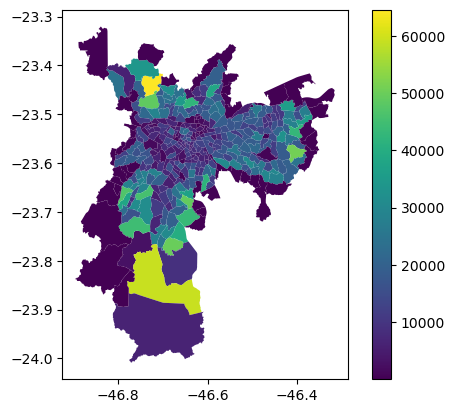

In [143]:
merged.plot(column="esp_1", legend=True)

In [144]:
merged.to_file("dados/od_agg_cnef_sp")

/var/folders/kf/12t4yv8j7pg0z8zqbypmj9440000gn/T/ipykernel_67182/178429584.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged.to_file("dados/od_agg_cnef_sp")
/opt/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'tipo_e_101.0' to 'tipo_e_101'
  ogr_write(
/opt/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'tipo_e_102.0' to 'tipo_e_102'
  ogr_write(
/opt/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'tipo_e_103.0' to 'tipo_e_103'
  ogr_write(
/opt/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'tipo_e_104.0' to 'tipo_e_104'
  ogr_write(
